# Testing validity with IL Synthesis Dataset

## Import Synthesis Dataset

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [59]:
def loadDataset(path):
    a = pd.read_csv(path)
    return a.drop(a.columns[0], axis=1)
def groupByRace(dataset):
    return dataset.groupby(by = ["race"])
def groupByFIPS(dataset):
    return dataset.groupby(by = ["FIPS"])
def groupByFIPSAndRace(dataset):
    return dataset.groupby(by = ["FIPS", "race"])

In [60]:
ILdataset = loadDataset('./data/generatedDatasets/IL_dataset_1.csv')

In [61]:
ILdataset.groupby(by = ["FIPS"]).FIPS.count()

FIPS
170010001001000     14
170010001001001      2
170010001001007     34
170010001001008    197
170010001001009     22
                  ... 
172030307003217     10
172030307003223      3
172030307003226      4
172030307003228      8
172030307003231      5
Name: FIPS, Length: 274573, dtype: int64

In [62]:
ILdataset.groupby(by = ["race"]).FIPS.count()

race
P1_003N    7867388
P1_004N    1808282
P1_005N      96640
P1_006N     755589
P1_007N       4499
            ...   
P1_065N        319
P1_066N         29
P1_067N          5
P1_069N         18
P1_071N         74
Name: FIPS, Length: 63, dtype: int64

In [63]:
ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])

count
FIPS            race          
170010001001000 P1_003N     14
170010001001001 P1_003N      2
170010001001007 P1_003N     28
                P1_004N      2
                P1_006N      4
...                        ...
172030307003223 P1_003N      3
172030307003226 P1_003N      4
172030307003228 P1_003N      8
172030307003231 P1_003N      4
                P1_015N      1

[814538 rows x 1 columns]

In [64]:
ILDatasetProcessed = pd.DataFrame(ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])).reset_index()
ILDatasetProcessed

,FIPS,race,count
0,170010001001000,P1_003N,14
1,170010001001001,P1_003N,2
2,170010001001007,P1_003N,28
3,170010001001007,P1_004N,2
4,170010001001007,P1_006N,4
...,...,...,...
814533,172030307003223,P1_003N,3
814534,172030307003226,P1_003N,4
814535,172030307003228,P1_003N,8
814536,172030307003231,P1_003N,4


## Import Real FIPS Data

In [65]:
from state import StateByBlockGroup
StateIL = StateByBlockGroup("17")
StateIL.decennialData

,GEO_ID,NAME,P1_001N,P1_001NA,P1_002N,P1_002NA,P1_003N,P1_003NA,P1_004N,P1_004NA,...,P1_069N,P1_069NA,P1_070N,P1_070NA,P1_071N,P1_071NA,state,county,tract,block
0,1000000US170010001001000,"Block 1000, Block Group 1, Census Tract 1, Ada...",17,NaN,17,NaN,16,NaN,1,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1000
1,1000000US170010001001001,"Block 1001, Block Group 1, Census Tract 1, Ada...",2,NaN,2,NaN,1,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1001
2,1000000US170010001001002,"Block 1002, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1002
3,1000000US170010001001003,"Block 1003, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1003
4,1000000US170010001001004,"Block 1004, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,1000000US172030307003228,"Block 3228, Block Group 3, Census Tract 307, W...",11,NaN,11,NaN,11,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3228
369974,1000000US172030307003229,"Block 3229, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3229
369975,1000000US172030307003230,"Block 3230, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3230
369976,1000000US172030307003231,"Block 3231, Block Group 3, Census Tract 307, W...",7,NaN,6,NaN,6,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3231


In [66]:
def processRealDataset(datasetdf):
    datasetdf["FIPS"] = datasetdf["GEO_ID"].map(lambda x: x[-15:])
    return datasetdf[["FIPS",
                'P1_003N', 'P1_004N', 'P1_005N', 'P1_006N', 'P1_007N',
                'P1_008N', 'P1_011N', 'P1_012N', 'P1_013N', 'P1_014N',
                'P1_015N', 'P1_016N', 'P1_017N', 'P1_018N', 'P1_019N',
                'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N', 'P1_024N',
                'P1_025N', 'P1_027N', 'P1_028N', 'P1_029N', 'P1_030N',
                'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
                'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N',
                'P1_041N', 'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N',
                'P1_046N', 'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N',
                'P1_052N', 'P1_053N', 'P1_054N', 'P1_055N', 'P1_056N',
                'P1_057N', 'P1_058N', 'P1_059N', 'P1_060N', 'P1_061N',
                'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N', 'P1_066N',
                'P1_067N', 'P1_068N', 'P1_069N', 'P1_071N'
            ]]

In [67]:
processedRealILDataset = processRealDataset(StateIL.decennialData)
processedRealILDataset

,FIPS,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_011N,P1_012N,P1_013N,...,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_071N
0,170010001001000,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,170010001001001,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170010001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,170010001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170010001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,172030307003228,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369974,172030307003229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369975,172030307003230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369976,172030307003231,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Comparing the two datasets distributions

## By Races

In [68]:
popByRaceSynthesis = ILdataset.groupby(by = ["race"]).FIPS.count()
popByRaceSynthesis

race
P1_003N    7867388
P1_004N    1808282
P1_005N      96640
P1_006N     755589
P1_007N       4499
            ...   
P1_065N        319
P1_066N         29
P1_067N          5
P1_069N         18
P1_071N         74
Name: FIPS, Length: 63, dtype: int64

In [69]:
popByRaceReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 0)
popByRaceReal

P1_003N    7868227
P1_004N    1808271
P1_005N      96498
P1_006N     754878
P1_007N       4501
            ...   
P1_066N         35
P1_067N         14
P1_068N          4
P1_069N         15
P1_071N         84
Length: 64, dtype: int64

### Plot samples

In [70]:
popByRaceSynthesis /= popByRaceSynthesis.sum()
popByRaceReal /= popByRaceReal.sum()

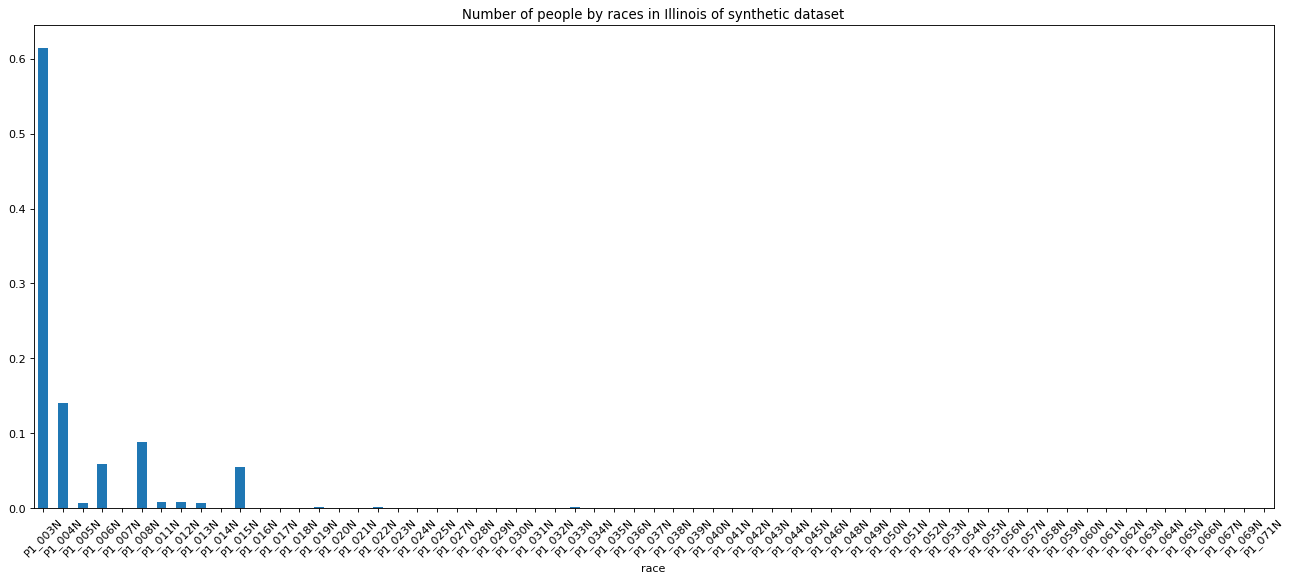

In [71]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceSynthesis.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

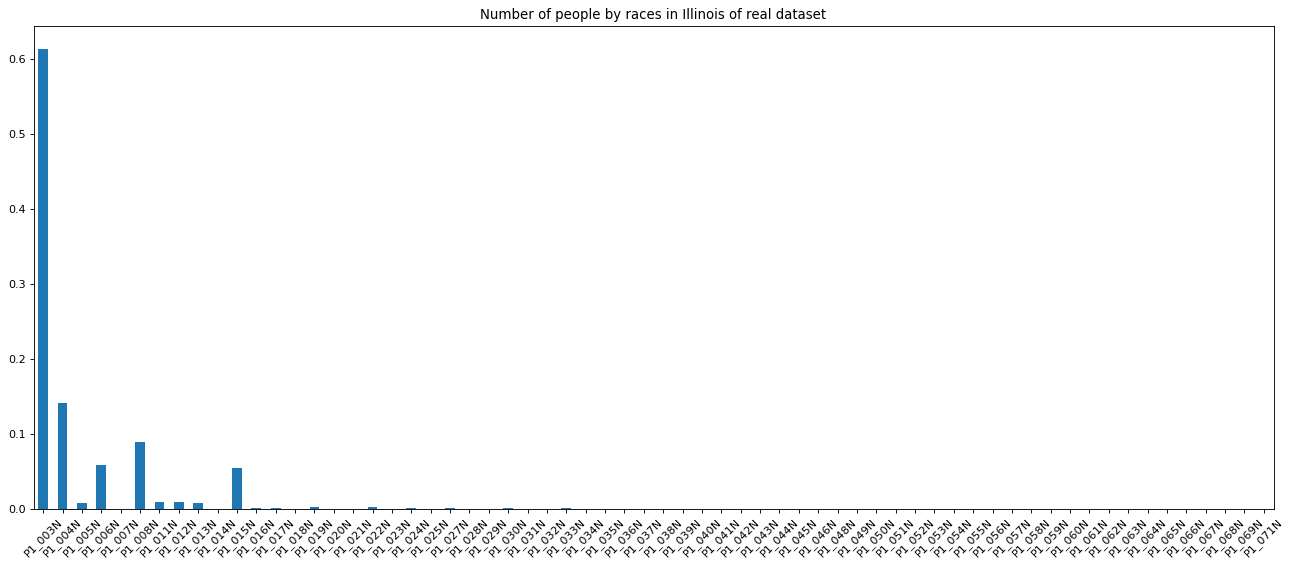

In [72]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceReal.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Compare sample mean and standard deviation

In [73]:
print("Mean of synthetic dataset", popByRaceSynthesis.mean())
print("Standard deviation of synthetic dataset", popByRaceSynthesis.std())

Mean of synthetic dataset 0.01587301587301587
Standard deviation of synthetic dataset 0.07988311647940127


In [74]:
print("Mean of real dataset", popByRaceReal.mean())
print("Standard deviation of real dataset", popByRaceReal.std())

Mean of real dataset 0.015625
Standard deviation of real dataset 0.07927505077520923


### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [75]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=popByRaceSynthesis, b=popByRaceReal, equal_var=True)

Ttest_indResult(statistic=0.01756099213843312, pvalue=0.9860170749346514)

Due to p value = 0.9999535792552408 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [76]:
popByRaceReal.name = "Real"
popByRaceSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByRaceSynthesis, popByRaceReal, right_index = True,
               left_index = True)

mergeddf

,Synthesis,Real
P1_003N,6.140397e-01,0.614073
P1_004N,1.411341e-01,0.141126
P1_005N,7.542629e-03,0.007531
P1_006N,5.897276e-02,0.058914
P1_007N,3.511412e-04,0.000351
...,...,...
P1_065N,2.489755e-05,0.000023
P1_066N,2.263413e-06,0.000003
P1_067N,3.902437e-07,0.000001
P1_069N,1.404877e-06,0.000001


In [77]:
stat, p, dof, expected = stats.chi2_contingency(mergeddf)
p

1.0

In [78]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Due to p value = 0.9908510047877276 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_1: $ The two datasets NOT come from the same ditribution 


In [79]:
stats.ks_2samp(popByRaceSynthesis, popByRaceReal)

KstestResult(statistic=0.05555555555555555, pvalue=0.9996817135681136)

Due to p value = 0.9999999044253438 >> 0.05. Therefore, there is no evidence to support the distributions of the two populations are not the same.

## By FIPS

In [80]:
popByFIPSSynthesis = ILdataset.groupby(by = ["FIPS"]).FIPS.count()
popByFIPSSynthesis = popByFIPSSynthesis.rename(lambda x: str(x))
popByFIPSSynthesis

FIPS
170010001001000     14
170010001001001      2
170010001001007     34
170010001001008    197
170010001001009     22
                  ... 
172030307003217     10
172030307003223      3
172030307003226      4
172030307003228      8
172030307003231      5
Name: FIPS, Length: 274573, dtype: int64

In [81]:
popByFIPSReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 1)
popByFIPSReal = popByFIPSReal.rename(processedRealILDataset['FIPS'])
popByFIPSReal

170010001001000    17
170010001001001     2
170010001001002     0
170010001001003     0
170010001001004     0
                   ..
172030307003228    11
172030307003229     0
172030307003230     0
172030307003231     7
172030307003232     0
Length: 369978, dtype: int64

In [82]:
popByFIPSSynthesis /= popByFIPSSynthesis.sum()
popByFIPSReal /= popByFIPSReal.sum()

### Plot samples

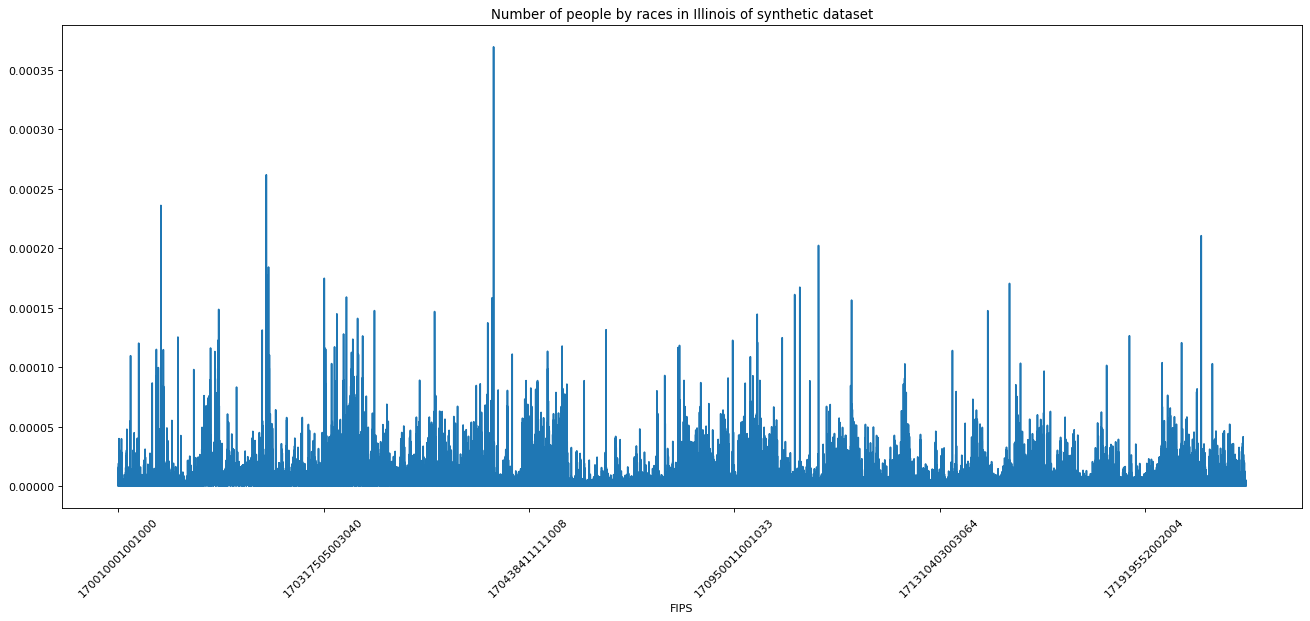

In [83]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSSynthesis.plot(x='FIPS', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

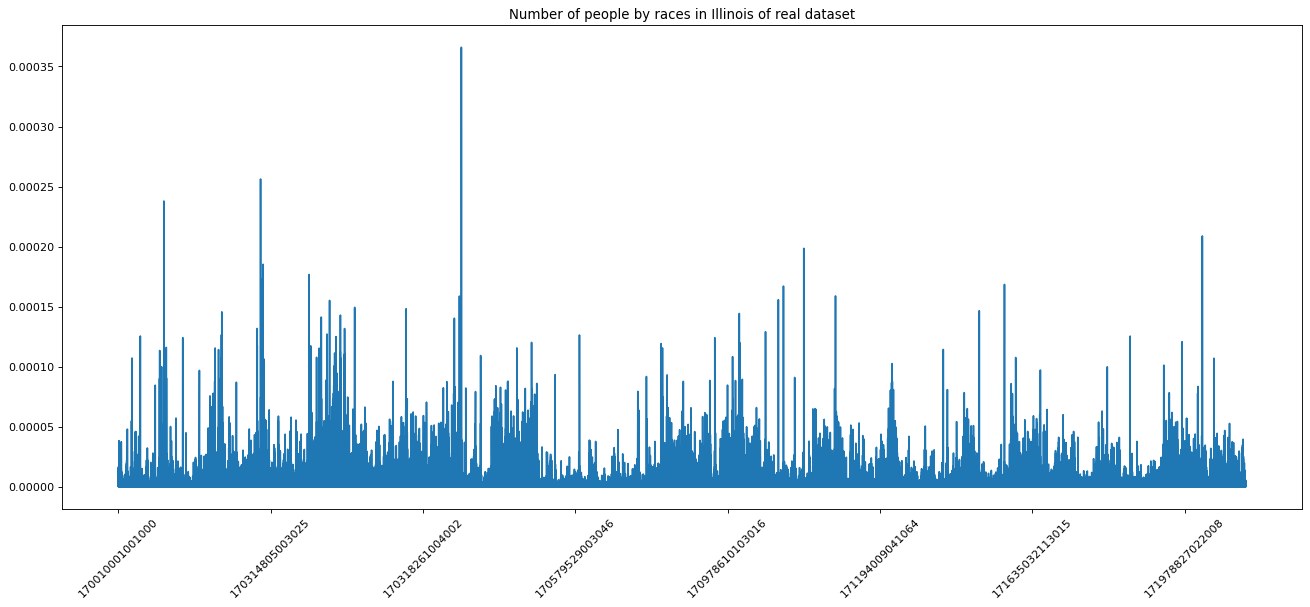

In [84]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSReal.plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [85]:
popByFIPSReal.name = "Real"
popByFIPSSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByFIPSSynthesis, popByFIPSReal, how= 'outer', right_index = True,
               left_index = True).fillna(0)
mergeddf = mergeddf.astype({'Synthesis': 'float32'})
mergeddf

,Synthesis,Real
170010001001000,1.092682e-06,1.326759e-06
170010001001001,1.560975e-07,1.560893e-07
170010001001002,0.000000e+00,0.000000e+00
170010001001003,0.000000e+00,0.000000e+00
170010001001004,0.000000e+00,0.000000e+00
...,...,...
172030307003228,6.243898e-07,8.584912e-07
172030307003229,0.000000e+00,0.000000e+00
172030307003230,0.000000e+00,0.000000e+00
172030307003231,3.902437e-07,5.463126e-07


### Compare sample mean and standard deviation

In [86]:
print("Mean of synthetic dataset", mergeddf["Synthesis"].mean())
print("Standard deviation of synthetic dataset", mergeddf["Synthesis"].std())

Mean of synthetic dataset 2.702654683162109e-06
Standard deviation of synthetic dataset 5.311856966727646e-06


In [87]:
print("Mean of real dataset", mergeddf["Real"].mean())
print("Standard deviation of real dataset", mergeddf["Real"].std())

Mean of real dataset 2.7028634135016203e-06
Standard deviation of real dataset 5.291909099026957e-06


### Binning FIPS

In [88]:
N = 50
mergeddf.index = mergeddf.index.map(lambda x : int(x))
binningdf = mergeddf.groupby(mergeddf.index // N).sum()
binningdf

,Synthesis,Real
3400200020020,0.000089,0.000089
3400200020040,0.000057,0.000058
3400200020060,0.000074,0.000072
3400200020080,0.000069,0.000071
3400200020100,0.000071,0.000073
...,...,...
3440606140060,0.000015,0.000015
3440606140061,0.000068,0.000069
3440606140062,0.000058,0.000056
3440606140063,0.000044,0.000044


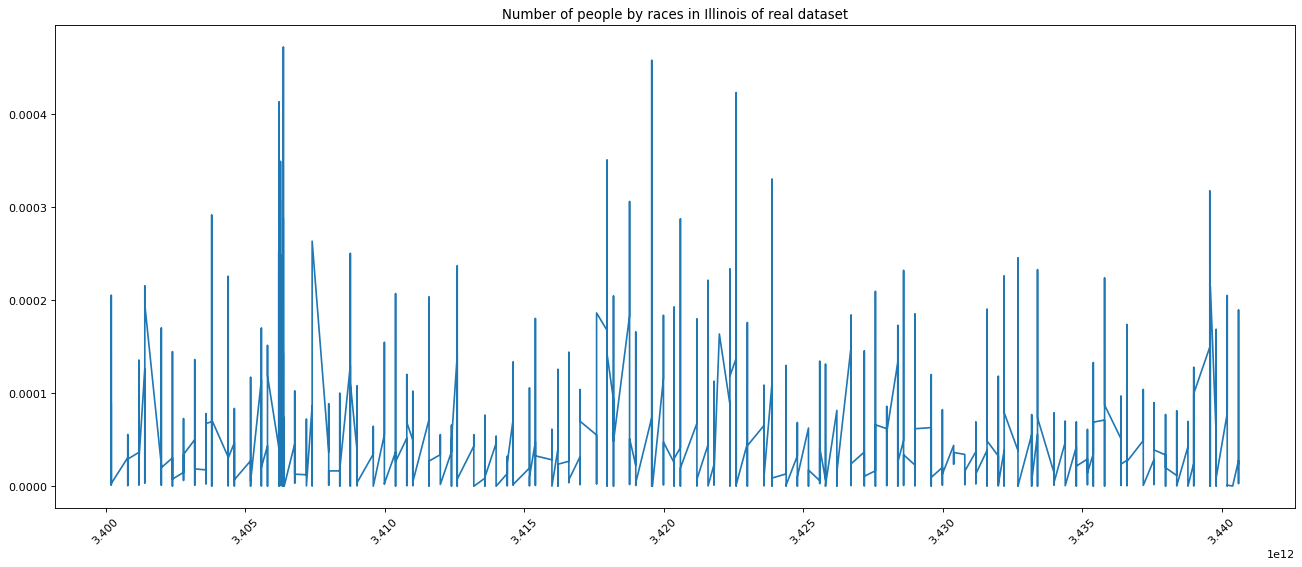

In [89]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Synthesis"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

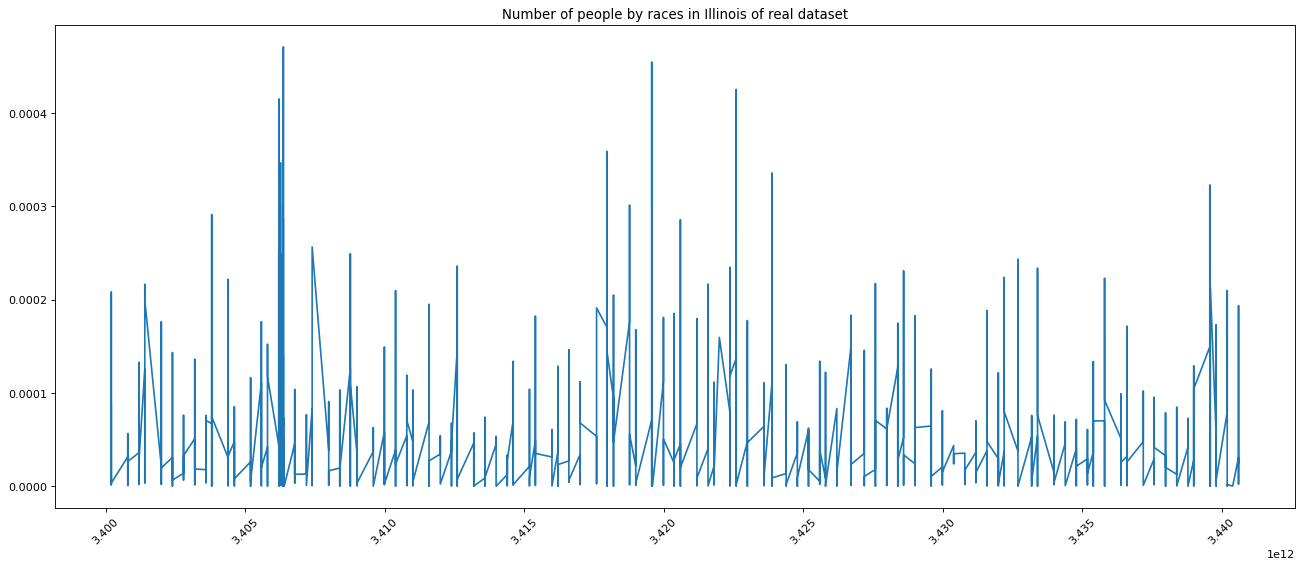

In [90]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Real"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [91]:
ct = pd.crosstab(binningdf["Real"], binningdf["Synthesis"], margins=True)
ct

Synthesis,0.0,7.804872836914001e-08,1.5609745673828002e-07,2.3414618510742002e-07,2.3414619931827474e-07,3.1219491347656003e-07,3.9024365605655476e-07,4.6829237021484005e-07,4.682923986365495e-07,5.463410843731253e-07,...,0.0003304583369754255,0.0003346729790791869,0.000349424168234691,0.00035098515218123794,0.0003541070909705013,0.00041350218816660345,0.0004234143707435578,0.00045814603799954057,0.0004724289756268263,All
Real,,,,,,,,,,,,,,,,,,,,,
0.0,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73
7.804465059331885e-08,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1.560893011866377e-07,2,3,2,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2.3413395177995655e-07,1,4,2,0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
3.121786023732754e-07,0,0,4,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000414885362554083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
0.00042503116713121444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0.00045445400040489565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [92]:
g, p, dof, expctd = stats.chi2_contingency(ct, lambda_="log-likelihood")

In [93]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(g) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [94]:
p

1.0

Due to p value = 1.0 >> 0.05.Therefore, there is no evidence to support the distributions of the two populations are not the same.

### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [95]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=binningdf["Synthesis"], b=binningdf["Real"], equal_var=True)

Ttest_indResult(statistic=-3.504235835679666e-06, pvalue=0.9999972040514115)

Due to p value = 0.9934190781015679 >> 0.05.Therefore, there is no evidence to support the population mean of the two populations are not the same.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_q: $ The two datasets NOT come from the same ditribution 


In [96]:
stats.ks_2samp(binningdf["Real"], binningdf["Synthesis"])

KstestResult(statistic=0.003099333643266755, pvalue=0.9999999687226653)

Due to p value = 0.4781688122978446 >> 0.05. Therefore, there is no evidence to support the two datasets NOT come from the same ditribution

## Benchmarking dataset

We will test the dataset by the 